In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import ExtraTreesRegressor
from scipy.stats import norm,skew,boxcox
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [34]:
#loading intermediate dataset ukbms and haduk, created in  HADUK_intermediate.py and UKBMS_HADUK_Exploration.ipynb
df = pd.read_csv('BioD_year_site_latlong.csv')
df.drop(columns=df.columns[0], inplace = True)
df

,Site Number,YEAR,SPECIES RICHNESS,TOTAL SITE INDEX,COUNTRY,Easting,Northing,sun,average temp,rainfall,relative humidity,Simpsons Index,Diversity,latitude,longitude
0,1,1976,27,798,England,521000.0,281000.0,1501.819509,9.953381,488.571987,81.285496,0.779181,High,52.413625,-0.222413
1,1,1977,28,413,England,521000.0,281000.0,1343.662376,9.526488,494.270350,83.330676,0.738111,High,52.413625,-0.222413
2,1,1978,27,857,England,521000.0,281000.0,1288.404486,9.407102,523.350323,84.013799,0.801127,High,52.413625,-0.222413
3,1,1979,27,825,England,521000.0,281000.0,1377.842541,9.009214,560.583337,83.049021,0.827729,High,52.413625,-0.222413
4,1,1980,27,911,England,521000.0,281000.0,1377.842541,9.009214,636.268119,83.049021,0.827968,High,52.413625,-0.222413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,5706,2020,15,796,England,420800.0,376000.0,1486.724707,9.134446,1264.091079,83.358684,0.848219,High,53.280572,-1.689506
24554,5707,2020,14,3070,England,406700.0,371200.0,1382.917646,8.727352,1713.559597,83.611149,0.794148,High,53.237789,-1.901073
24555,5708,2020,13,1507,England,427200.0,315700.0,1557.146589,10.361915,934.172339,81.763461,0.854101,High,52.738252,-1.598579
24556,5709,2020,18,1343,England,427800.0,316800.0,1557.146589,10.361915,934.172339,81.763461,0.887389,High,52.748110,-1.589600


In [35]:
x = df[['sun','average temp','rainfall','relative humidity']]
y= df[['Simpsons Index']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) #split into training and testing sets

Text(0.5, 1.0, 'Boxplot of climatic variables')

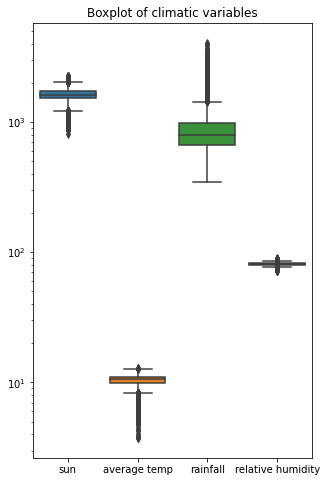

In [36]:
df1_climate = df.drop(columns=['Simpsons Index','SPECIES RICHNESS','TOTAL SITE INDEX','Site Number', 'YEAR', 'Easting','Northing','latitude','longitude'])
df1_climate.describe()

fig,ax = plt.subplots(figsize=(5,8))
bxplot = sns.boxplot(data=df1_climate)
bxplot.set_yscale('log')
plt.title('Boxplot of climatic variables')

-1.9612755667749275


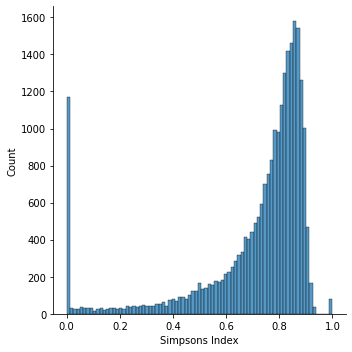

In [37]:
sns.displot(df['Simpsons Index'])
print(skew(df['Simpsons Index']))

Linear Regression:


In [38]:
#training the GLM
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[ 7.94406877e-05 -1.31174298e-03 -8.25458646e-05 -8.85894908e-03]]
[1.38765334]


In [39]:
preds = model.predict(x_test)

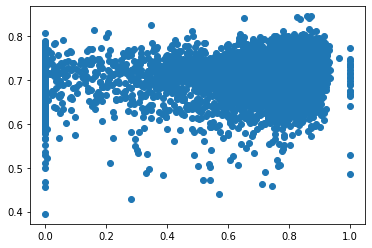

In [40]:
plt.scatter(y_test,preds)

plt.show()

In [41]:
mse = metrics.mean_squared_error(y_test,preds)
print(mse)
print(np.sqrt(mse))

0.047636714055158264
0.21825836537268914


<AxesSubplot:>

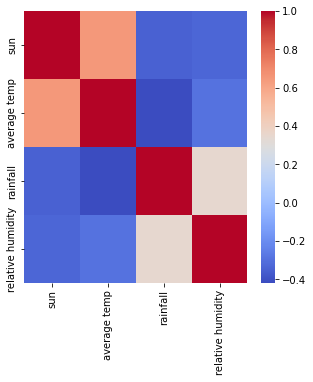

In [42]:
#checking cooccurence matrix
corr = x_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='coolwarm')

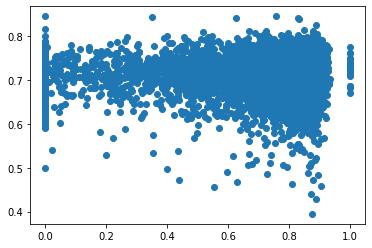

0.05119092163102242
0.22625410853954106


In [43]:
#trying to linear regression by dropping co-occuring variable: sunshine hours
x2 = df[['average temp','rainfall','relative humidity']]
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.3) #split into training and testing sets
model2 = LinearRegression()
model2.fit(x_train2,y_train2)
preds2 = model2.predict(x_test2)
plt.scatter(y_test2,preds)
plt.show()
mse2 = metrics.mean_squared_error(y_test2,preds2)
print(mse2)
print(np.sqrt(mse2))

Decision Tree:


In [44]:
x3 = df[['sun','average temp','rainfall','relative humidity']]
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y,test_size=0.3, random_state=44) #split into training and testing sets


/var/folders/dm/ys_v7_dn4p7d13d409tlwpt00000gn/T/ipykernel_26181/3113692524.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train3,y_train3)


<AxesSubplot:>

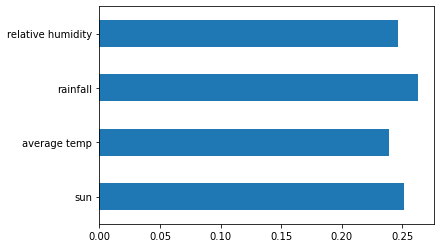

In [45]:
# #decision tree hyperparameter tuning
reg = ExtraTreesRegressor()
reg.fit(x_train3,y_train3)
feat_importances = pd.Series(reg.feature_importances_,index=x_train3.columns)
feat_importances.plot(kind='barh') #finding which features are most important for the model

In [46]:
model4_tree = tree.DecisionTreeRegressor()
model4_tree.fit(x_train3,y_train3)

DecisionTreeRegressor()

In [47]:
preds4 = model4_tree.predict(x_test3)

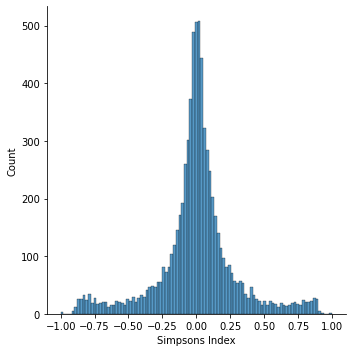

In [48]:
y_test3 = y_test3.squeeze()
sns.displot(y_test3-preds4)

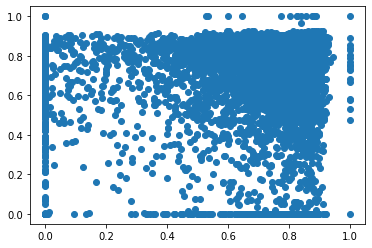

In [49]:
plt.scatter(y_test3,preds4)

In [50]:
mse3 = metrics.mean_squared_error(y_test3,preds4)
print(mse3)
print(np.sqrt(mse3))

0.08303099662937385
0.2881509962317914


In [51]:
#hyperparameter tuning 
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [55]:
tuning_model=GridSearchCV(model4_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_sample = df.sample(frac=0.5) #sampling dataset to prevent crashses when fitting tuning model
x_tuning = tuning_sample[['sun','average temp','relative humidity','rainfall']]
y_tuning = tuning_sample[['Simpsons Index']]

In [56]:
tuning_model.fit(x_tuning,y_tuning)

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.048 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.1s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.050 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.052 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.050 total time=   0.0s
[CV 1/3] END max_featu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9600 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9600 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [54]:
print(tuning_model.best_params_)
print(tuning_model.best_score_)

{'max_features': 'sqrt', 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-0.050282907401643206
